In [1]:
from os.path import join, isdir
from os import sep, getcwd, chdir
from ExperimentSettings import EXPERIMENT_SETTINGS
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Imports from parent directory
original_cur_dir = getcwd()
chdir('..')
from ResultsAnalyzer import ResultsAnalyzer
# Go back to current directory
chdir(original_cur_dir)

# General configuration

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
experiment_main_dir = 'Experiment'
anom_comm_names = [f'comm0{i+1}' for i in range(110, 120)]
meta_feature = 'normality_prob_std'

In [5]:
res_analyzer = ResultsAnalyzer(experiment_main_dir, EXPERIMENT_SETTINGS, anom_comm_names)

# Compare to baselines

In [6]:
#output = res_analyzer.baseline_comparison_dev(meta_feature=meta_feature, reverse=False)

In [7]:
#output

In [20]:
#output.style.highlight_max(axis=1)

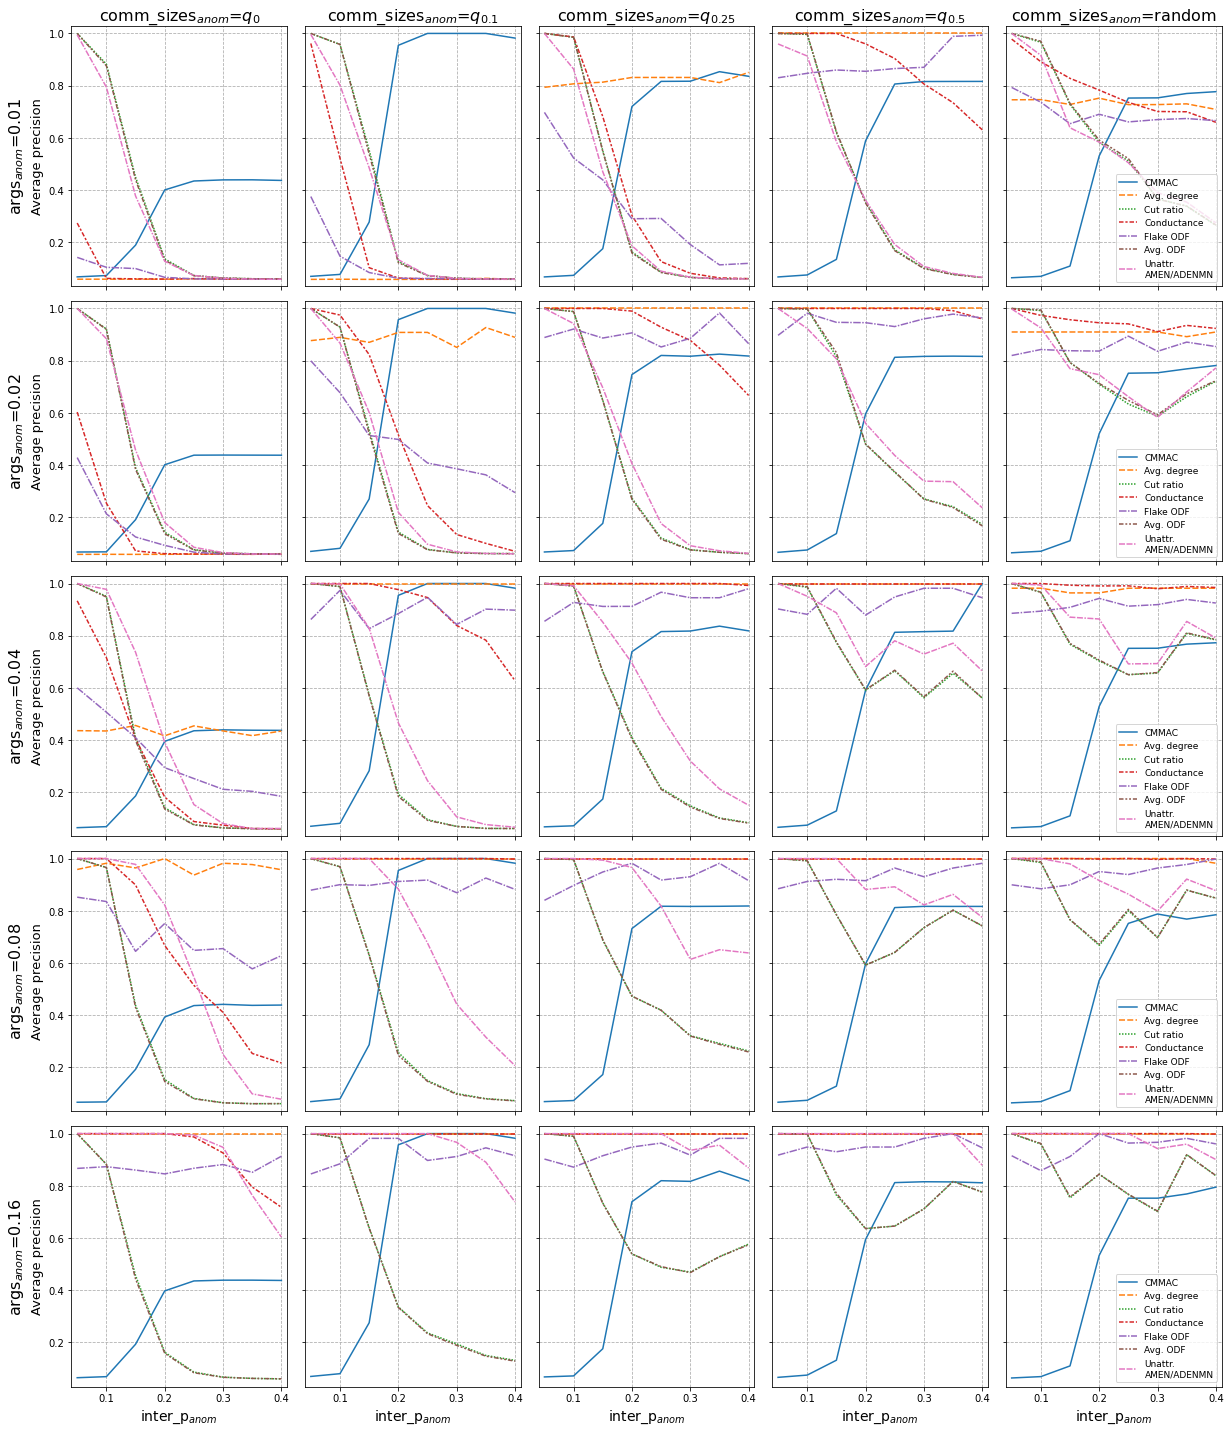

In [7]:
res_analyzer.plot_baseline_comparison(meta_feature=meta_feature, reverse=False)

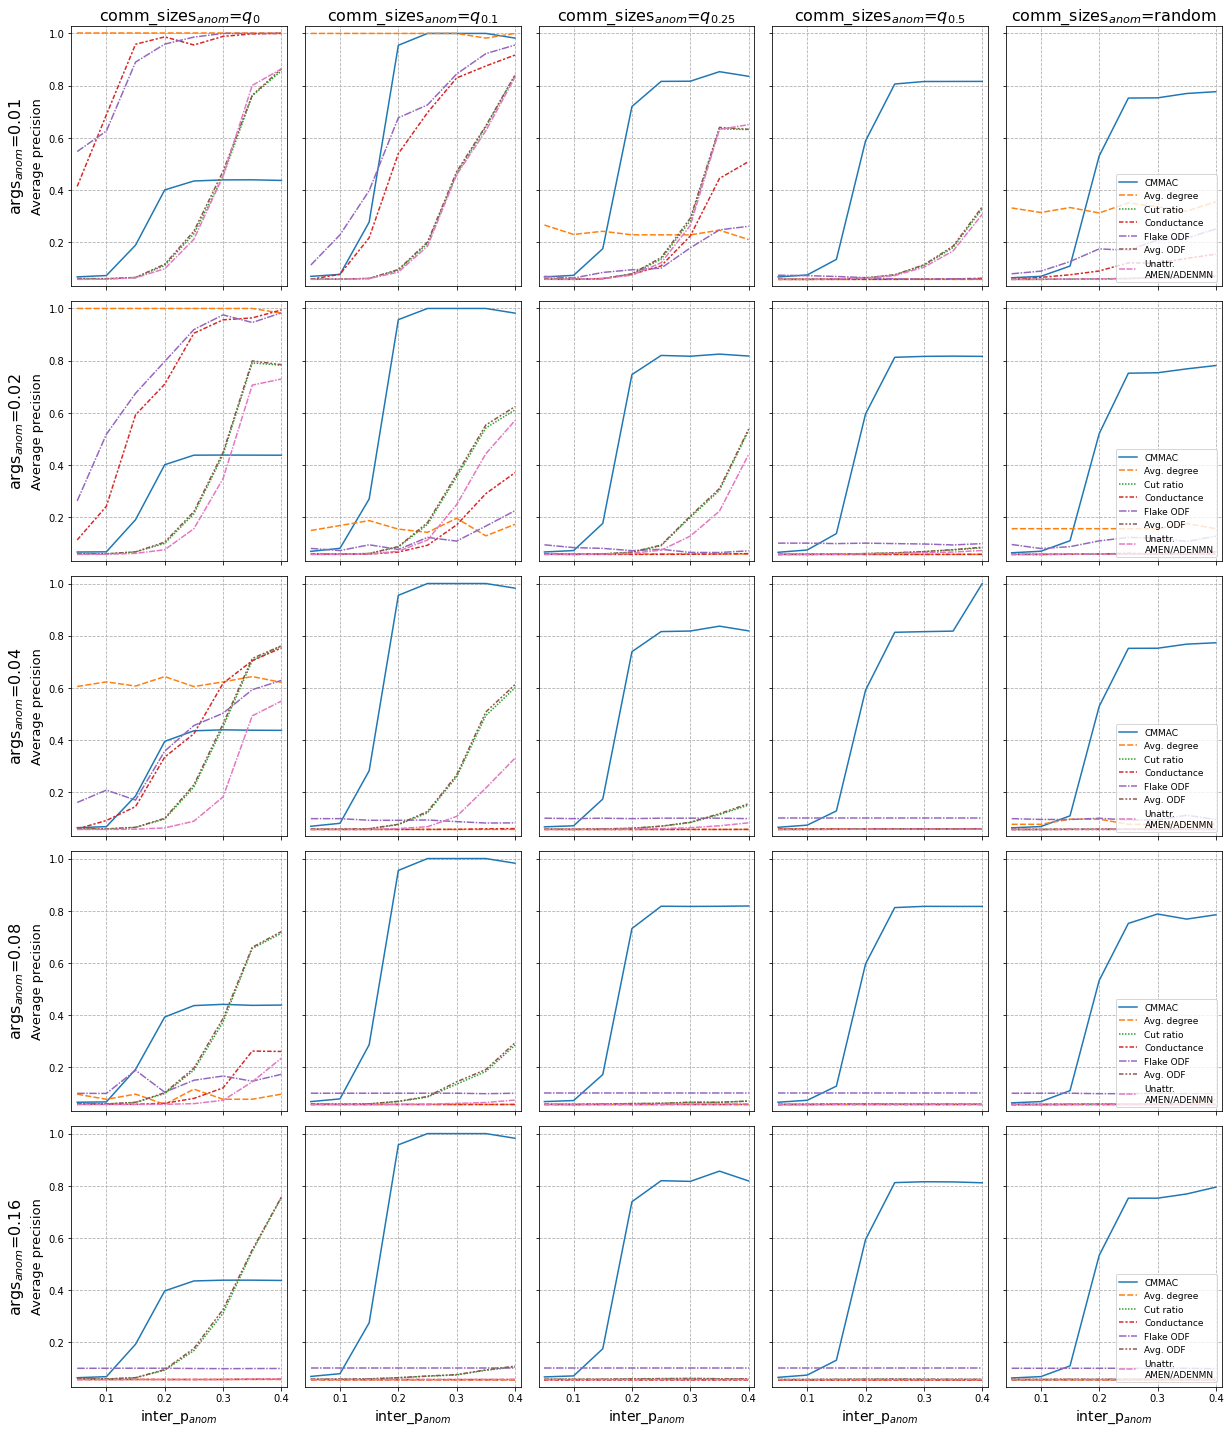

In [8]:
res_analyzer.plot_baseline_comparison(meta_feature=meta_feature, reverse=True)

In [8]:
from ResultsAnalyzer import _ALL_PS, _ALL_SIZE_GROUPS, _ALL_MS
from tqdm.autonotebook import tqdm

_ALL_MS = [0.01, 0.02, 0.04, 0.08, 0.16]

In [9]:
output = []
for p in tqdm(_ALL_PS):
    for size_group in tqdm(_ALL_SIZE_GROUPS, leave=False):
        for m in _ALL_MS:
            exp_dir_path = res_analyzer._ordered_dir_paths[f'p{p:.2f}'][size_group][f'm{m:.2f}']

            my_results = res_analyzer.create_single_experiment_results_analysis_df(dir_path=exp_dir_path, algo='OurResults')[['normality_prob_std']]
            my_results.rename({'normality_prob_std': 'CMMAC'}, axis=1, inplace=True)
            my_results.reset_index(drop=True, inplace=True)
            baseline_results = res_analyzer.create_single_experiment_results_analysis_df(dir_path=exp_dir_path, algo='BaselineResults', reverse=False)
            baseline_results.reset_index(drop=True, inplace=True)
            results = pd.concat([my_results, baseline_results], axis=1)
            
            results_dict = results.to_dict(orient='index')
            results_dict = {(p, size_group, m, k+1): v for k,v in results_dict.items()}
            
            scores_df = pd.DataFrame.from_dict(results_dict, orient='index')
            scores_df.reset_index(inplace=True)
            scores_df.rename({
                'level_0': '$inter\_p_{anom}$',
                'level_1': '$comm\_sizes_{anom}$',
                'level_2': '$args_{anom}$',
                'level_3': 'network_num'}, axis=1, inplace=True)
            
            scores_df['$comm\_sizes_{anom}$'] = pd.Categorical(
                scores_df['$comm\_sizes_{anom}$'],
                categories=['min', 'quantile10', 'quartile1', 'median', 'random'],
                ordered=True)
            scores_df.sort_values('$comm\_sizes_{anom}$', inplace=True)
            
            output.append(scores_df)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [29]:
concat_scores = pd.concat(output)

concat_scores = concat_scores.set_index(['$inter\_p_{anom}$', '$comm\_sizes_{anom}$', '$args_{anom}$', 'network_num'])

algo_name_mapper = {
    'CMMAC': '$CMMAC$',
    'OurAlgorithm': '$CMMAC$',
    'avg_degree': '$Avg. degree$',
    'cut_ratio': '$Cut ratio$',
    'conductance': '$Conductance$',
    'flake_odf': '$Flake ODF$',
    'avg_odf': '$Avg. ODF$',
    'unattr_amen': '$Unattr. AMEN/ADENMN$'
}

algo_name_mapper = {
    'CMMAC': 'CMMAC',
    'OurAlgorithm': 'CMMAC',
    'avg_degree': 'Avg. degree',
    'cut_ratio': 'Cut ratio',
    'conductance': 'Conductance',
    'flake_odf': 'Flake ODF',
    'avg_odf': 'Avg. ODF',
    'unattr_amen': 'Unattr. \nAMEN/ADENMN'
}


concat_scores.rename(algo_name_mapper, axis=1, inplace=True)

concat_scores = pd.DataFrame(concat_scores.stack()).reset_index()

concat_scores = concat_scores.rename({'level_4': 'Method',0: 'Average precision'}, axis=1)

In [30]:
concat_scores = concat_scores.reset_index(drop=True)

In [31]:
concat_scores

,$inter\_p_{anom}$,$comm\_sizes_{anom}$,$args_{anom}$,network_num,Method,Average precision
0,0.050,min,0.010,1,CMMAC,0.072
1,0.050,min,0.010,1,Avg. degree,0.058
2,0.050,min,0.010,1,Cut ratio,1.000
3,0.050,min,0.010,1,Conductance,0.064
4,0.050,min,0.010,1,Flake ODF,0.061
5,0.050,min,0.010,1,Avg. ODF,1.000
6,0.050,min,0.010,1,Unattr. \nAMEN/ADENMN,1.000
7,0.050,min,0.010,2,CMMAC,0.076
8,0.050,min,0.010,2,Avg. degree,0.057
9,0.050,min,0.010,2,Cut ratio,1.000


In [40]:
comm_size = 'quantile10'
args_anom = 0.02

to_display = concat_scores.loc[
    (concat_scores['$comm\_sizes_{anom}$']==comm_size) &
    (concat_scores['$args_{anom}$']==args_anom)
]

In [41]:
to_display

,$inter\_p_{anom}$,$comm\_sizes_{anom}$,$args_{anom}$,network_num,Method,Average precision
210,0.050,quantile10,0.020,1,CMMAC,0.070
211,0.050,quantile10,0.020,1,Avg. degree,0.383
212,0.050,quantile10,0.020,1,Cut ratio,1.000
213,0.050,quantile10,0.020,1,Conductance,1.000
214,0.050,quantile10,0.020,1,Flake ODF,0.635
215,0.050,quantile10,0.020,1,Avg. ODF,1.000
216,0.050,quantile10,0.020,1,Unattr. \nAMEN/ADENMN,1.000
217,0.050,quantile10,0.020,2,CMMAC,0.064
218,0.050,quantile10,0.020,2,Avg. degree,1.000
219,0.050,quantile10,0.020,2,Cut ratio,1.000


In [42]:
to_report = to_display.groupby(['Method', '$inter\_p_{anom}$']).aggregate({'Average precision': 'mean'}).reset_index()
to_report = to_report.pivot(index='$inter\_p_{anom}$', columns='Method', values='Average precision')
to_report.reset_index(inplace=True)

In [43]:
to_report.style.highlight_max(axis=1)

Method,$inter\_p_{anom}$,Avg. ODF,Avg. degree,CMMAC,Conductance,Cut ratio,Flake ODF,Unattr. AMEN/ADENMN
0,0.05,1,0.87668,0.0684219,1,1,0.799215,1
1,0.1,0.928588,0.889219,0.080145,0.974723,0.928588,0.676953,0.867062
2,0.15,0.521263,0.870066,0.269377,0.823262,0.53309,0.512805,0.601176
3,0.2,0.137091,0.908144,0.957149,0.515925,0.142565,0.497736,0.21815
4,0.25,0.0747343,0.908258,1,0.244091,0.0758829,0.407402,0.0957823
5,0.3,0.0625687,0.850772,1,0.133195,0.0627999,0.385092,0.0663599
6,0.35,0.0599548,0.926925,1,0.099091,0.0600607,0.361879,0.0605645
7,0.4,0.0599439,0.889197,0.982128,0.068614,0.0597667,0.293742,0.0587277


In [44]:
_SIZE_GROUPS_DISPLAY_NAME_MAP = {
	'min': '$q_{0}$',
	'quantile10': '$q_{0.1}$',
	'quartile1': '$q_{0.25}$',
	'median': '$q_{0.5}$',
	'random': 'random',
}

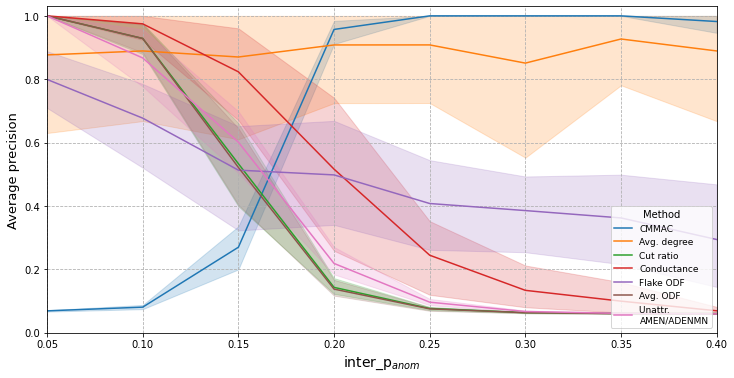

In [48]:
fig, ax = plt.subplots(1,1,figsize=(12, 6),tight_layout=False)


legend = 'full'
sns.lineplot(data=to_display, x='$inter\_p_{anom}$', y='Average precision', hue='Method', ax=ax , dashes=True, legend=legend)


ax.set_xlabel('inter_p$_{anom}$', fontsize=14)
ax.grid(ls='--')
#ax.text(-0.07, 0.53, "args$_{anom}$=" + f"{m}", size=16, verticalalignment='center', rotation=90)
ax.set_ylabel("Average precision", fontsize=13)


#ax.set_title("comm_sizes$_{anom}$=" + f"{_SIZE_GROUPS_DISPLAY_NAME_MAP[size_group]}", fontsize=16)



plt.setp(ax, ylim=(0.0, 1.03), xlim=(0.05, 0.4))

plt.show()

In [48]:
#### averaging over the 5 networks
#a = concat_scores.loc[concat_scores['Method']!='Avg. degree']
a = concat_scores.copy()

print(a.shape)
a = a.groupby(['$comm\_sizes_{anom}$', '$args_{anom}$', '$inter\_p_{anom}$', 'Method']).aggregate({'Average precision': 'mean'}).reset_index()

#### find best method for set of paramaters

def x(temp_df):
    return temp_df.loc[temp_df['Average precision'].idxmax(), 'Method']

a = a.groupby(['$comm\_sizes_{anom}$', '$args_{anom}$', '$inter\_p_{anom}$']).apply(x)

a = pd.DataFrame(a)

a = a.reset_index().rename({0:'Method'},axis=1)

#### leaving only CMMAC

a = a.loc[a['Method']=='CMMAC']

####finding min inter_p value

a = a.groupby(['$comm\_sizes_{anom}$', '$args_{anom}$']).aggregate({'$inter\_p_{anom}$': 'min'}).reset_index()

#a = a.pivot(index='$args_{anom}$', columns='$comm\_sizes_{anom}$', values='$inter\_p_{anom}$')

a

(7000, 6)


,$comm\_sizes_{anom}$,$args_{anom}$,$inter\_p_{anom}$
0,min,0.010,0.200
1,min,0.020,0.200
2,min,0.040,0.300
3,quantile10,0.010,0.200
4,quantile10,0.020,0.200
5,quartile1,0.010,0.350
6,random,0.010,0.250


In [49]:
for size in concat_scores['$comm\_sizes_{anom}$'].unique():
    if size in a['$comm\_sizes_{anom}$'].unique():
        continue
    for m in concat_scores['$args_{anom}$'].unique():
        if m in a['$args_{anom}$'].unique():
            continue
        a = a.append({'$comm\_sizes_{anom}$': size, '$args_{anom}$':m}, ignore_index=True)

In [50]:
a

,$comm\_sizes_{anom}$,$args_{anom}$,$inter\_p_{anom}$
0,min,0.010,0.200
1,min,0.020,0.200
2,min,0.040,0.300
3,quantile10,0.010,0.200
4,quantile10,0.020,0.200
5,quartile1,0.010,0.350
6,random,0.010,0.250
7,median,0.080,nan
8,median,0.160,nan


In [51]:
a = a.pivot(index='$args_{anom}$', columns='$comm\_sizes_{anom}$', values='$inter\_p_{anom}$')


In [52]:
_SIZE_GROUPS_DISPLAY_NAME_MAP = {
	'min': '$q_{0}$',
	'quantile10': '$q_{0.1}$',
	'quartile1': '$q_{0.25}$',
	'median': '$q_{0.5}$',
	'random': 'random',
}

In [55]:
a = a.rename(_SIZE_GROUPS_DISPLAY_NAME_MAP, axis=1)

In [58]:
a = a[['$q_{0}$', '$q_{0.1}$', '$q_{0.25}$', '$q_{0.5}$', 'random']]

In [89]:
print(a.to_latex())

\begin{tabular}{lrrrrr}
\toprule
\$comm\textbackslash \_sizes\_\{anom\}\$ &  \$q\_\{0\}\$ &  \$q\_\{0.1\}\$ &  \$q\_\{0.25\}\$ &  \$q\_\{0.5\}\$ &  random \\
\$args\_\{anom\}\$ &          &            &             &            &         \\
\midrule
0.010         &    0.200 &      0.200 &       0.350 &        nan &   0.250 \\
0.020         &    0.200 &      0.200 &         nan &        nan &     nan \\
0.040         &    0.300 &        nan &         nan &        nan &     nan \\
0.080         &      nan &        nan &         nan &        nan &     nan \\
0.160         &      nan &        nan &         nan &        nan &     nan \\
\bottomrule
\end{tabular}

